In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats as stat
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
import numpy as np
import pandas as pd
import tensorflow as tf
#import hvplot.pandas
%matplotlib inline
from sklearn import metrics
from numpy.random import seed
seed(1)
from tensorflow import random
tf.set_random_seed(2)
from datetime import datetime
from alpha_vantage.timeseries import TimeSeries
import os 
from scipy import stats as stat
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
from afinn import Afinn
afinn = Afinn()
import os
import csv
from matplotlib.dates import DateFormatter
import seaborn as sns
import math
import time
from tensorflow.keras.layers import GRU, LSTM, Bidirectional, Dense, Flatten, Conv1D, Conv2D, MaxPooling2D,MaxPooling1D,Flatten, BatchNormalization, LeakyReLU, Dropout
from tensorflow.keras import Sequential
from keras.utils.vis_utils import plot_model
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from sklearn.preprocessing import StandardScaler,MinMaxScaler
#from datetime import datetime
from tensorflow.compat.v1.keras.layers import CuDNNLSTM,Bidirectional

from pickle import load
from sklearn.metrics import mean_squared_error
from tqdm import tqdm
import statsmodels.api as sm
from math import sqrt
from datetime import datetime, timedelta
from sklearn.preprocessing import MinMaxScaler
from pickle import dump
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import unicodedata

import warnings
warnings.filterwarnings("ignore")

In [72]:
cpy = pd.read_csv('Company.csv')
cpy_tweet = pd.read_csv('Company_Tweet.csv')
tweet = pd.read_csv('Tweet.csv')
tweets = pd.merge(tweet,cpy_tweet,on='tweet_id',how='inner')
tweets['date'] = pd.to_datetime(tweets['post_date'].apply(lambda date: datetime.fromtimestamp(date).date()))

In [73]:
tweets = tweets.drop(['tweet_id'],axis=1)

In [74]:
tweets.isna().sum()
tweet = tweets.copy()
tweet["sentiment_score"] = ''
tweet["Negative"] = ''
tweet["Neutral"] = ''
tweet["Positive"] = ''
tweet.head()

,writer,post_date,body,comment_num,retweet_num,like_num,ticker_symbol,date,sentiment_score,Negative,Neutral,Positive
0,VisualStockRSRC,1420070457,"lx21 made $10,008 on $AAPL -Check it out! htt...",0,0,1,AAPL,2014-12-31,,,,
1,KeralaGuy77,1420070496,Insanity of today weirdo massive selling. $aap...,0,0,0,AAPL,2014-12-31,,,,
2,DozenStocks,1420070510,S&P100 #Stocks Performance $HD $LOW $SBUX $TGT...,0,0,0,AMZN,2014-12-31,,,,
3,ShowDreamCar,1420070807,$GM $TSLA: Volkswagen Pushes 2014 Record Recal...,0,0,1,TSLA,2014-12-31,,,,
4,i_Know_First,1420071005,Swing Trading: Up To 8.91% Return In 14 Days h...,0,0,1,AAPL,2014-12-31,,,,


In [75]:
tweets.ticker_symbol.value_counts()

AAPL     1425013
TSLA     1096868
AMZN      718715
GOOG      392569
MSFT      375711
GOOGL     327569
Name: ticker_symbol, dtype: int64

In [76]:
aapl = tweet[tweets['ticker_symbol'] == 'AAPL']
tsla = tweet[tweets['ticker_symbol'] == 'TSLA']
amzn = tweet[tweets['ticker_symbol'] == 'AMZN']
msft = tweet[tweets['ticker_symbol'] == 'MSFT']
goog = tweet[tweets['ticker_symbol'] == 'GOOG']
googl = tweet[tweets['ticker_symbol'] == 'GOOGL'] 

In [77]:

def van_sent(sent_df):
    sentiment_analyzer = SentimentIntensityAnalyzer()
    start_time = time.time()
    for indx, row in sent_df.T.iteritems():
        try:
            sentence_i = unicodedata.normalize('NFKD', sent_df.loc[indx, 'body'])
            sentence_sentiment = sentiment_analyzer.polarity_scores(sentence_i)
            sent_df.at[indx, 'sentiment_score'] = sentence_sentiment['compound']
            sent_df.at[indx, 'Negative'] = sentence_sentiment['neg']
            sent_df.at[indx, 'Neutral'] = sentence_sentiment['neu']
            sent_df.at[indx, 'Positive'] = sentence_sentiment['pos']
        except TypeError:
            return (sent_df.loc[indexx, 'body'])
            print (indx)
            break
    elapsed_time = time.time() - start_time
    mins, secs = divmod(elapsed_time, 60)
    print(f"Elapsed time: {int(mins)} mins, {int(secs)} secs")
    return sent_df

In [78]:
#aapl_sen = van_sent(aapl)
tsla_sen = van_sent(tsla)
msft_sen = van_sent(msft)
googl_sen = van_sent(googl)
amzn_sen = van_sent(amzn)

Elapsed time: 5 mins, 42 secs
Elapsed time: 1 mins, 35 secs
Elapsed time: 1 mins, 22 secs
Elapsed time: 3 mins, 7 secs


In [79]:
aapl_sen

,writer,post_date,body,comment_num,retweet_num,like_num,ticker_symbol,date,sentiment_score,Negative,Neutral,Positive
0,VisualStockRSRC,1420070457,"lx21 made $10,008 on $AAPL -Check it out! htt...",0,0,1,AAPL,2014-12-31,0.0,0.0,1.0,0.0
1,KeralaGuy77,1420070496,Insanity of today weirdo massive selling. $aap...,0,0,0,AAPL,2014-12-31,-0.8271,0.339,0.661,0.0
4,i_Know_First,1420071005,Swing Trading: Up To 8.91% Return In 14 Days h...,0,0,1,AAPL,2014-12-31,0.0,0.0,1.0,0.0
6,aaplstocknews,1420071005,Swing Trading: Up To 8.91% Return In 14 Days h...,0,0,1,AAPL,2014-12-31,0.0,0.0,1.0,0.0
8,iknowfirst,1420071005,Swing Trading: Up To 8.91% Return In 14 Days h...,0,0,1,AAPL,2014-12-31,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4336437,QuantWolfLine,1577836261,Imagine calling your broker-dealer and wanting...,1,0,1,AAPL,2019-12-31,0.4939,0.063,0.767,0.17
4336438,GMGRIFF_79,1577836266,"$AAPL yearly~ Heck of a year.. Jan. 2, 1999~ar...",0,0,1,AAPL,2019-12-31,0.7574,0.0,0.772,0.228
4336439,TEEELAZER,1577836383,That $SPY $SPX puuump in the last hour was the...,1,0,6,AAPL,2019-12-31,-0.3382,0.092,0.824,0.084
4336442,MoriaCrypto,1577836537,I don't discriminate. I own both $aapl and $ms...,1,0,1,AAPL,2019-12-31,0.0,0.0,1.0,0.0


In [80]:
def clean(sent_df):
    sent_df['date'] = pd.to_datetime(sent_df['date'])
    sent_df['date'] = sent_df['date'].dt.date
    sent_df = sent_df.drop(columns=['comment_num', 'retweet_num','like_num','post_date','Negative', 'Positive', 'Neutral', 'writer'])
    twitter_df = sent_df.groupby([sent_df['date']]).mean()
    return twitter_df

In [59]:
aapl_sent = clean(aapl_sen)

In [81]:
googl_sent = clean(googl_sen)
tsla_sent = clean(tsla_sen)
amzn_sent = clean(amzn_sen)
msft_sent = clean(msft_sen)

In [60]:
aapl_sent

,sentiment_score
date,
2014-12-31,0.062273
2015-01-01,0.149360
2015-01-02,0.104502
2015-01-03,0.237682
2015-01-04,0.228038
...,...
2019-12-27,0.164244
2019-12-28,0.183477
2019-12-29,0.163096


In [82]:
def stock_getter(ticker, output, twitter_df):
    ts = TimeSeries(key='DIR3OHC94MGGVLVO', output_format ='pandas')
    data, metadata = ts.get_daily_adjusted(ticker ,outputsize= output)
    data.reset_index(inplace=True)
    #adjusting the stocks for the 2015-219
    data['date'] = pd.to_datetime(data['date'],format='%Y-%m-%d')
    data1 = data.loc[data['date'] >='2015-01-02']
    a_stock = data1.loc[data['date'] <= '2019-12-30']
    a_stock= a_stock.drop(columns=['5. adjusted close', "7. dividend amount", "8. split coefficient"])
    a_stock = a_stock.rename(columns={"date":"date", "1. open":"Open","2. high":"High", "3. low" : "Low", "4. close":"Close", 
                          "6. volume":"Volume"})
    a_stock.sort_values(by='date', inplace = True)
    a_stock.reset_index()
    a_stock['date'] = pd.to_datetime(a_stock['date'])
    a_stock['date']= a_stock['date'].dt.date
    final_df = a_stock.join(twitter_df, how = "left", on="date")
    datetime_series = pd.to_datetime(final_df['date'])
    datetime_index = pd.DatetimeIndex(datetime_series.values)
    dataset = final_df.set_index(datetime_index)
    dataset = dataset.sort_values(by='date')
    dataset = dataset.drop(columns='date')
    return a_stock, final_df, dataset

In [83]:
aapl_stock, aapl_df, aapl_df2 = stock_getter("AAPL", "full",aapl_sent)
tsla_stock, tsla_df, tsla_df2 = stock_getter("TSLA", "full",tsla_sent)
msft_stock, msft_df, msft_df2 = stock_getter("MSFT", "full",msft_sent)
amzn_stock, amzn_df, amzn_df2 = stock_getter("AMZN", "full",amzn_sent)
googl_stock, googl_df, googl_df2 = stock_getter("GOOGL", "full",googl_sent)

In [84]:
googl_df2.head()

,Open,High,Low,Close,Volume,sentiment_score
2015-01-02,532.60,535.8000,527.88,529.55,1327870.0,0.172654
2015-01-05,527.15,527.9899,517.75,519.46,2059119.0,0.365634
2015-01-06,520.50,521.2100,505.55,506.64,2731813.0,0.368067
2015-01-07,510.95,511.4900,503.65,505.15,2345875.0,0.307035
2015-01-08,501.51,507.5000,495.02,506.91,3662224.0,0.223730


In [63]:
def hist_prices(final_df, stock_name):
    fig, ax = plt.subplots(figsize=(15,8))
    ax.plot(final_df['date'], final_df['Close'], color='#008B8B')
    ax.set(xlabel="date", ylabel="USD", title=f"{stock_name} Stock Price")
    ax.xaxis.set_major_formatter(DateFormatter("%Y"))
    plt.show()

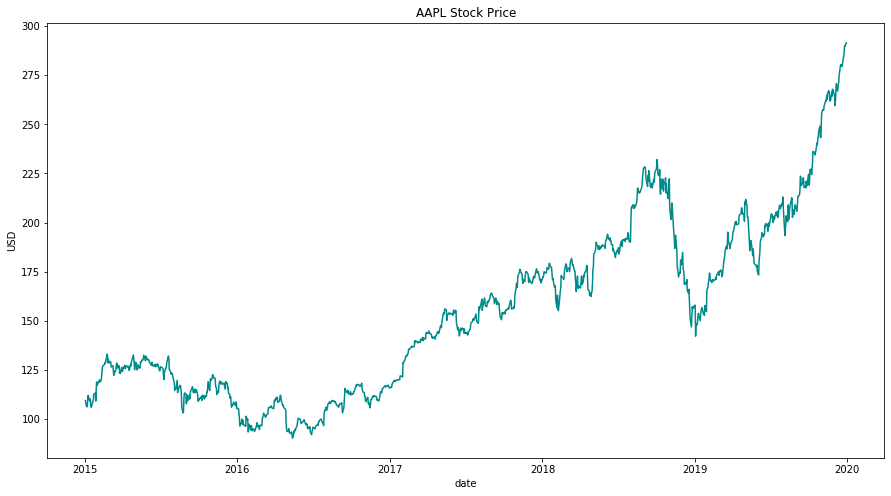

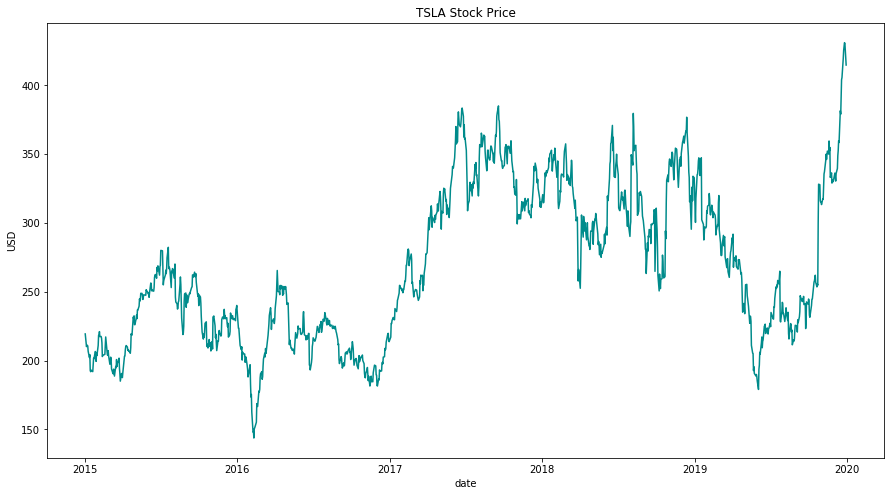

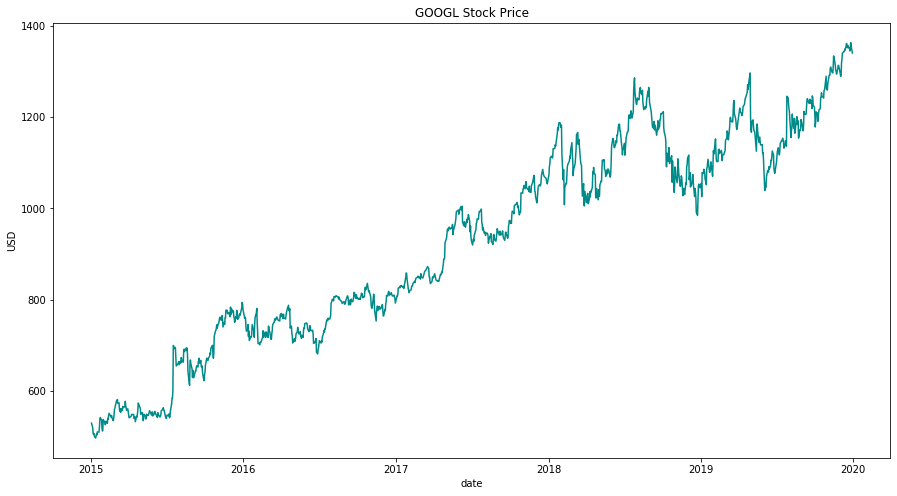

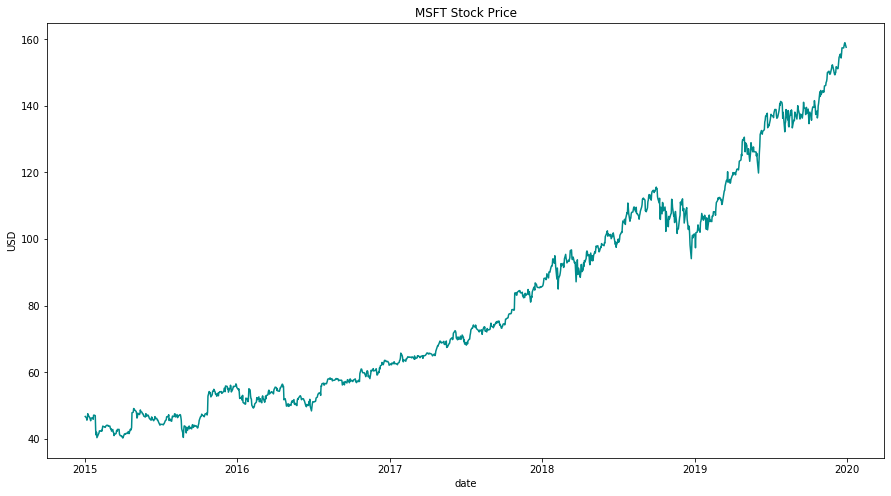

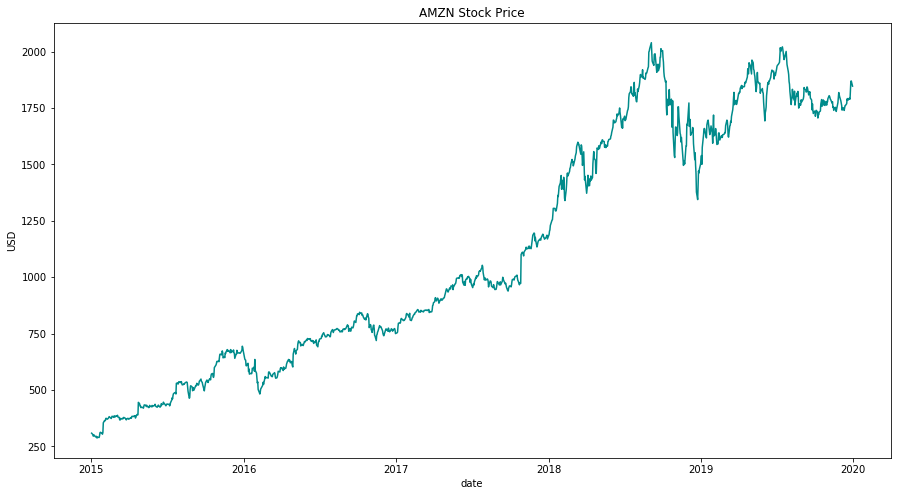

In [18]:
hist_prices(aapl_df, "AAPL")
hist_prices(tsla_df, "TSLA")
hist_prices(googl_df, "GOOGL")
hist_prices(msft_df, "MSFT")
hist_prices(amzn_df, "AMZN")

In [86]:
# This function "window_data" accepts the column number for the features (X) and the target (y)
# It chunks the data up with a rolling window of Xt-n to predict Xt
# It returns a numpy array of X any y
def window_data(df, window, feature_col_number1, feature_col_number2, feature_col_number3, target_col_number):
    X_open = []
    X_senti = []
    X_corr = []
    y = []
    for i in range(len(df) - window):
     
        close = df.iloc[i:(i + window), feature_col_number1]
        ts_polarity = df.iloc[i:(i + window), feature_col_number2]
        tw_vol = df.iloc[i:(i + window), feature_col_number3]
        target = df.iloc[(i + window), target_col_number]
        
        # Append values in the lists
        X_open.append(close)
        X_senti.append(ts_polarity)
        X_corr.append(tw_vol)
        y.append(target)
        
    return np.hstack((X_open,X_senti,X_corr)), np.array(y).reshape(-1, 1)

In [87]:
def data_train(sent_stock):
# Predict Closing Prices using a 3 day window of previous closing prices
    window_size = 3

    feature_col_number1 = 3
    feature_col_number2 = 5
    feature_col_number3 = 4
    target_col_number = 3
    X, y = window_data(sent_stock, window_size, feature_col_number1,feature_col_number2, feature_col_number3, target_col_number)
    X_split = int(0.7 * len(X))
    y_split = int(0.7 * len(y))

    X_train = X[: X_split]
    X_test = X[X_split:]
    y_train = y[: y_split]
    y_test = y[y_split:]
 
    x_train_scaler = MinMaxScaler()
    x_test_scaler = MinMaxScaler()
    y_train_scaler = MinMaxScaler()
    y_test_scaler = MinMaxScaler()

    x_train_scaler.fit(X_train)
    y_train_scaler.fit(y_train)

    X_train = x_train_scaler.transform(X_train)
    y_train = y_train_scaler.transform(y_train)

    # Fit the scaler for the Testing Data
    x_test_scaler.fit(X_test)
    y_test_scaler.fit(y_test)

    # Scale the y_test data
    X_test = x_test_scaler.transform(X_test)
    y_test = y_test_scaler.transform(y_test)

    # Reshape the features for the model
    X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
    X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
    return X_test, X_train, y_test, y_train,y_test_scaler

In [88]:
aapl_test, aapl_train, appl_testy, appl_trainy, aapl_test_scaler = data_train(aapl_df2)
tsla_test, tsla_train, tsla_testy, tsla_trainy, tsla_test_scaler = data_train(tsla_df2)
msft_test, msft_train, msft_testy, msft_trainy, msft_test_scaler = data_train(msft_df2)
googl_test, googl_train, googl_testy, googl_trainy, googl_test_scaler = data_train(googl_df2)
amzn_test, amzn_train, amzn_testy, amzn_trainy, amzn_test_scaler = data_train(amzn_df2)

In [89]:
from xgboost import XGBRegressor
from xgboost import XGBRegressor
from sklearn import metrics
import numpy as np

def modelbuilder(X_test, X_train, y_test, y_train):
    X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1]))
    model = XGBRegressor(objective='reg:squarederror', n_estimators=1000)
    model.fit(X_train, y_train.ravel())
    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1]))
    predicted = model.predict(X_test)
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predicted)))
    print('R-squared:', metrics.r2_score(y_test, predicted))
    return predicted


In [90]:
amzn_predicted = modelbuilder(amzn_test, amzn_train, amzn_testy, amzn_trainy)
aapl_predicted = modelbuilder(aapl_test, aapl_train, appl_testy, appl_trainy)
msft_predicted = modelbuilder(msft_test, msft_train, msft_testy, msft_trainy)
googl_predicted = modelbuilder(googl_test, googl_train, googl_testy, googl_trainy)
tsla_predicted = modelbuilder(tsla_test, tsla_train, tsla_testy, tsla_trainy)

Root Mean Squared Error: 0.05203442433824164
R-squared: 0.9154465616497113
Root Mean Squared Error: 0.030108990060190494
R-squared: 0.9785112122622248
Root Mean Squared Error: 0.029883108042964037
R-squared: 0.9857880610670718
Root Mean Squared Error: 0.052415412373548624
R-squared: 0.9409684715362088
Root Mean Squared Error: 0.045447585495461885
R-squared: 0.9490307150737883


In [91]:
import holoviews as hv
import hvplot.pandas
def predictmodel(X_test, y_test, predicted, name, merged, y_test_scaler):
    # Recover the original prices instead of the scaled version
    predicted_prices = y_test_scaler.inverse_transform(predicted.reshape(-1, 1))
    real_prices = y_test_scaler.inverse_transform(y_test.reshape(-1, 1))
    # Create a DataFrame of Real and Predicted values
    real_prices = y_test_scaler.inverse_transform(y_test)
    real_prices = pd.Series(real_prices.ravel()).dropna().values
    merged = merged.iloc[-len(real_prices):].reset_index(drop=True)
    merged = merged.sort_index().reset_index()
    stocks =  pd.DataFrame({
        "Real": real_prices.ravel(),
        "Predicted": predicted_prices.ravel()
    }, index=merged[-len(real_prices):].index)
    xticks = pd.date_range(start='2015', end='2019', freq='YS')
    xlabels = [d.strftime('%Y') for d in xticks]
    plot = stocks.hvplot(title="Real vs Predicted values of XGB Vander " + name, xticks=xticks, xlabel='Year', ylabel='Stock Price')
    plot.opts(yformatter="%.0f", height=300, width=450)
    return plot

In [92]:
import holoviews as hv
from bokeh.layouts import gridplot
from bokeh.plotting import show
df = predictmodel(googl_test, googl_testy, googl_predicted, "GOOGL", googl_sen,googl_test_scaler)
df1 = predictmodel(tsla_test, tsla_testy, tsla_predicted, "TSLA", tsla_sen,tsla_test_scaler)
df2 = predictmodel(aapl_test, appl_testy, aapl_predicted, "AAPL", aapl_sen,aapl_test_scaler)
df3 = predictmodel(msft_test, msft_testy, msft_predicted, "MSFT", msft_sen,msft_test_scaler)
plot1 = hv.render(df)
plot2 = hv.render(df1)
plot3 = hv.render(df2)
plot4 = hv.render(df3)

grid = gridplot([[plot1, plot2], [plot3, plot4]], width=370, height=250)

# show the grid plot
show(grid)

In [42]:
predictmodel(amzn_test, amzn_testy, amzn_predicted, "AMZN", amzn_sen, amzn_test_scaler)

:NdOverlay   [Variable]
   :Curve   [index]   (value)

In [70]:
 predictmodel(aapl_test, appl_testy, aapl_predicted, "AAPL", aapl_sen,aapl_test_scaler)

:NdOverlay   [Variable]
   :Curve   [index]   (value)